<a href="https://colab.research.google.com/github/RohanC07/Machine_Learning/blob/main/MLiC_Assessment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Machine Learning in Chemistry
---
## Assessment 02 - Unsupervised learning of coordination numbers

One popular area of application for machine learning in chemistry is the prediction of molecular properties; these are time- and resource-intensive to calculate using traditional computational chemical programs, but can be predicted using machine-learning models in a tiny fraction of the time.

Your dataset contains the molecular structures of a set of iron-containing molecules, in the extended XYZ format. In some structures the iron atom forms 4 bonds, in some 7 bonds, and in some 8 bonds - this is called the coordination number of the metal. Your task is to perform some unsupervised learning to try to group the provided structures into these three categories, without having access to the labels which specify which structure falls into which class. To do this you will need to perform 4 steps:
1. Calculate descriptors to describe the molecular structure
2. Assign cluster labels to each structure
3. Perform a dimensionality reduction on the molecular descriptors
4. Visualise the distribution of the molecular descriptors in two dimensions.

Note that steps 2 and 3 can be done in either order. You will be marked according to [this marking matrix](https://docs.google.com/document/d/13m8GDhYp5ozSo5MCrP6PKKiuv8ScsAOOUe7W6x8q9wU/edit?usp=sharing); the categories in the matrix are described in more detail below.

### Calculate Descriptors (30% of the mark)

You are encouraged to use the dscribe module to generate descriptors of the molecular structures. You will find the [documentation](https://singroup.github.io/dscribe/latest/index.html) helpful, and you may also find [the paper which describes the different descriptors](https://arxiv.org/pdf/1904.08875) useful. You may use any descriptors you like, and may use descriptors which describe the whole molecule, or descriptors which describe atomic environments. To help you with the latter, a list is provided which identifies the index of the Fe atom in every structure; you may find it helpful to use the `centers` argument when creating atom-centred descriptors. You should demonstrate the use of at least two descriptors in this notebook, and should investigate the effect of changing the parameter(s) used to generate the at least one of the descriptors.

### Assign Cluster Labels (20% of the mark)

You will need to assign a cluster to label each molecule. You may use any method from [SciKit-learn's set of tools](https://scikit-learn.org/stable/modules/clustering.html); some of these methods were discussed in the unsupervised learning lecture and workshop in the skills course in Semester 1, but you are welcome to use any method you choose. Clustering may be carried out before or after dimensionality reduction. You should demonstrate the use of at least two clustering methods in this notebook.

### Dimensionality Reduction (20% of the mark)

In order to visualise the dataset, you will need to perform a dimenionsionality reduction on the dataset. The simplest and fastest method to do this is [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html); this was also covered in the Skills module in Semester 1. However, there are a number of other [linear](https://scikit-learn.org/stable/api/sklearn.decomposition.html) and [non-linear](https://scikit-learn.org/stable/modules/manifold.html#manifold) approaches to dimensionality reduction, such as Independent Component Analysis and Multi-dimensional Scaling (MDS) respectively. You should demonstrate the use of at least two dimensionality reduction methods in this notebook.

### Visualisations (10% of the mark)

Once you have performed the clustering and dimensionality reduction, you should visualise the dataset on a two-dimensional graph, colouring each point according to the cluster label assigned to it. You should generate a large number of graphs during this assessment (at least 10 should be included in this notebook) while investigating different combinations of the descriptors, clustering methods and dimensionality reduction methods. Therefore, you should ensure that all of your plots are clearly labelled.

### Writing your Report (20% of the mark)

Since this is an unsupervised learning task, there is no "correct" answer against which to compare your work. This means you will need to make choices about which methods and parameters you think work best to solve this problem. You should explain the reasons for your choices as you go through your notebook, using text boxes for this purpose, rather than comments on your code. 10% of your total mark will be awarded for the reasoning you show when describing which choices you have made and why you have made them. The remaining 10% of the mark will be for the clarity of your notebook and the quality of the comments on your code.

---

## Getting Set Up

The following code blocks install the Python libraries you will need to complete this assessment, and provide the code necessary to load the data (`mols`), create a list which contains all of the atomic species present in the dataset (`species`), and create a list which contains the index of the iron (Fe) atom in each molecular structure (`Fe_index`).

In [1]:
!pip install ase dscribe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 6.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import ase.io
import numpy as np

# Load the configurations of the iron-containing molecules
mols = ase.io.read('/content/drive/MyDrive/Colab Notebooks/Assesment/ML in chemistry from Atoms to Atmosphere Assessment /Fe_molecules.xyz',":")

# Create a list of every type of atom which appears in any molecule in the dataset.
species = []
for mol in mols:
    symbols = mol.get_chemical_symbols()
    for atom in set(symbols):
        if atom not in species: species.append(atom)

# Create a list which identifies the index of the iron atom in every molecule in the dataset.
Fe_index = []
for mol in mols:
    Fe_index.append([i for i,j in enumerate(mol.get_chemical_symbols()) if j =='Fe'])

In [39]:
# Display the atomic types found in the dataset
print("Atomic types in the dataset:", species)

Atomic types in the dataset: ['I', 'Fe', 'O', 'N', 'C', 'H', 'Se', 'Cl', 'P', 'S', 'Br', 'Si', 'B', 'F', 'As']


---
## Over to you!

In the remainder of the notebook, follow the steps described above to try to cluster the structures provided into 3 groups, based on the number of bonds the iron atom in each molecule forms. Remember to use at least two methods for each step, and to explain the choices you make along the way. Please contact me at alan.m.lewis@york.ac.uk if you have questions about the assignment.

# **Step 1 : Calculate descriptors to describe the molecular structure**
# 1. Coulomb Matrix Descriptor

### Descriptor Choice and Parameters

I chose the SOAP (Smooth Overlap of Atomic Positions) descriptor for its ability to describe the local environment around iron atoms, which is directly related to coordination numbers. SOAP is invariant to rotations and translations, making it suitable for molecular data.

Parameters chosen:
- Cutoff radius \(r_{cut} = 4.0\) Å to include neighboring atoms effectively.
- \(n_{max} = 6\) and \(l_{max} = 4\) balance descriptor detail with computational cost.

Descriptors are computed centered on Fe atoms and averaged if multiple Fe atoms exist in a molecule.


Shape of Coulomb Matrix descriptors: (926, 3600)


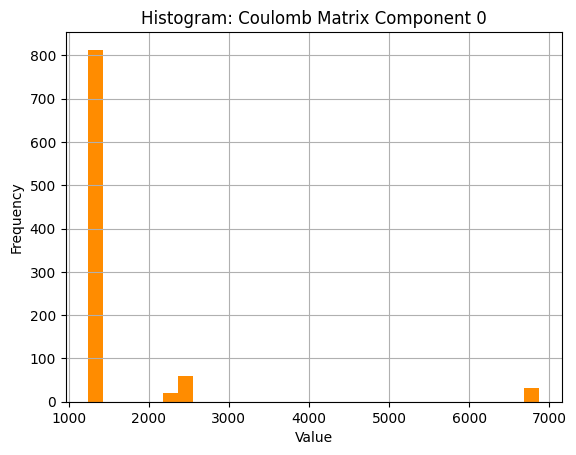

In [4]:
from dscribe.descriptors import CoulombMatrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define Coulomb Matrix descriptor generator
cm_desc = CoulombMatrix(n_atoms_max= max(len(mol) for mol in mols), permutation='sorted_l2') # Ensures permutation invariance by sorting atoms based on L2 norm of matrix rows

# Calculate descriptors
cm_features = np.array([cm_desc.create(mol) for mol in mols])

# Normalize the features
scaler_cm = StandardScaler()
cm_features_scaled = scaler_cm.fit_transform(cm_features)
print("Shape of Coulomb Matrix descriptors:", cm_features_scaled.shape)

plt.hist(cm_features[:, 0], bins=30, color='darkorange')
plt.title("Histogram: Coulomb Matrix Component 0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2. SOAP Descriptor (Fe-centered)

Shape of SOAP descriptors: (926, 20475)


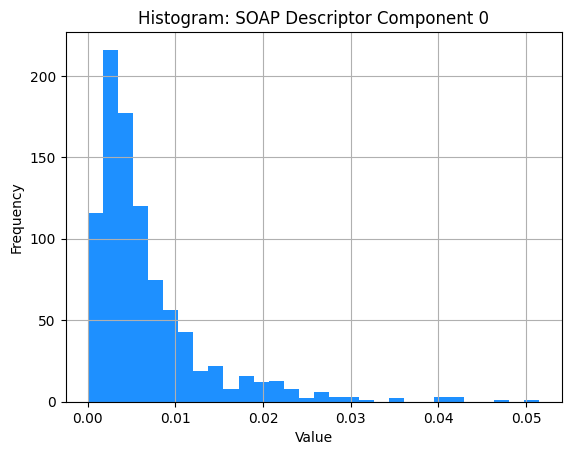

In [58]:
from dscribe.descriptors import SOAP

# Define SOAP descriptor generator
# Automatically extract all unique species
species = []
for mol in mols:
    for atom in mol.get_chemical_symbols():
        if atom not in species:
            species.append(atom)
r_cut = 4.0
n_max = 6
l_max = 4

# Setting up the SOAP descriptor
soap_desc = SOAP(
    species=species,
    periodic=False,
    r_cut=r_cut,
    n_max=n_max,
    l_max=l_max,
)

# Calculate SOAP descriptors centered on Fe atoms
soap_features = []
for mol, centers in zip(mols, Fe_index):
    desc = soap_desc.create(mol, centers=centers)
    # Average the SOAP over all Fe atoms in case there are more than one
    soap_features.append(np.mean(desc, axis=0))

soap_features = np.array(soap_features)

# Normalize the features
scaler_soap = StandardScaler()
soap_features_scaled = scaler_soap.fit_transform(soap_features)
print("Shape of SOAP descriptors:", soap_features_scaled.shape)

plt.hist(soap_features[:, 0], bins=30, color='dodgerblue')
plt.title("Histogram: SOAP Descriptor Component 0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Step 2: Assign cluster labels to each structure**

# 1. KMeans Clustering
 ### Clustering Method Selection

Two clustering algorithms were used to capture different assumptions about cluster shapes:

- KMeans: Efficient and assumes spherical clusters, suitable for initial exploratory clustering.
- Agglomerative Clustering: Hierarchical, flexible with cluster shapes, to test robustness of cluster assignments.

The number of clusters is set to 3, corresponding to expected coordination numbers.

In [59]:
from sklearn.cluster import KMeans

# KMeans clustering on SOAP
# We expect 3 clusters (coordination numbers: 4, 7, 8)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(soap_features_scaled)

In [60]:
from sklearn.cluster import KMeans

# KMeans clustering on Coulomb matrix
kmeans_cm = KMeans(n_clusters=3, random_state=42)
kmeans_cm_labels = kmeans_cm.fit_predict(cm_features_scaled)

# 2. Agglomerative Clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering

## Agglomerative Clustering on SOAP
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(soap_features_scaled)

In [62]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering on Coulomb matrix
agglo_cm = AgglomerativeClustering(n_clusters=3)
agglo_cm_labels = agglo_cm.fit_predict(cm_features_scaled)


# **Step 3: Dimensionality Reduction**
# 1. PCA (Principal Component Analysis)
### Dimensionality Reduction Techniques

To visualize the high-dimensional descriptor data, two methods were applied:

- PCA: A linear method capturing the main variance directions.
- t-SNE: A nonlinear method preserving local neighbor relations, useful for revealing complex structures.

Using both provides complementary perspectives on the molecular descriptor space.

- For SOAP

In [63]:
from sklearn.decomposition import PCA

# Reduce to 3 components for visualization
pca = PCA(n_components=3)
soap_pca = pca.fit_transform(soap_features_scaled)

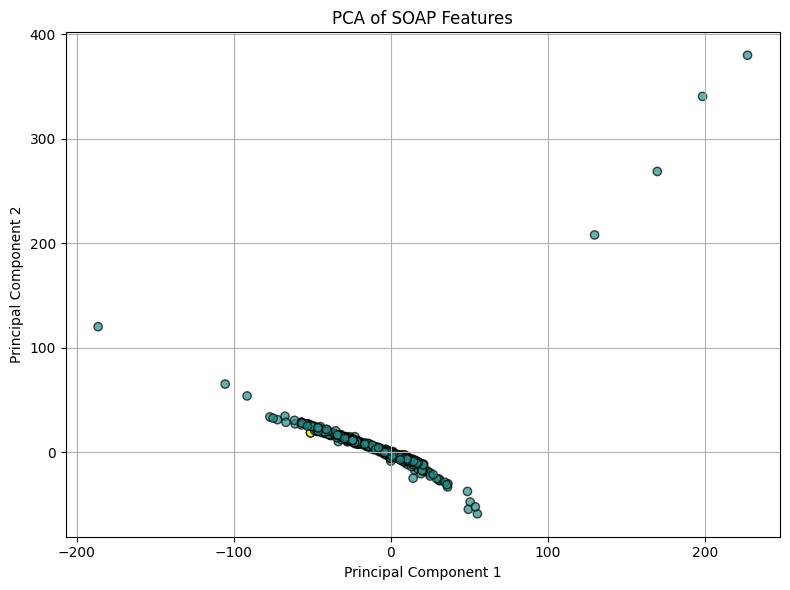

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(soap_pca[:, 0], soap_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7,edgecolor='k')
plt.title("PCA of SOAP Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

- For Coulomb Matrix

In [65]:
from sklearn.decomposition import PCA

# Perform PCA with 3 components
pca_cm_3d = PCA(n_components=3)
cm_pca_3d = pca_cm_3d.fit_transform(cm_features_scaled)

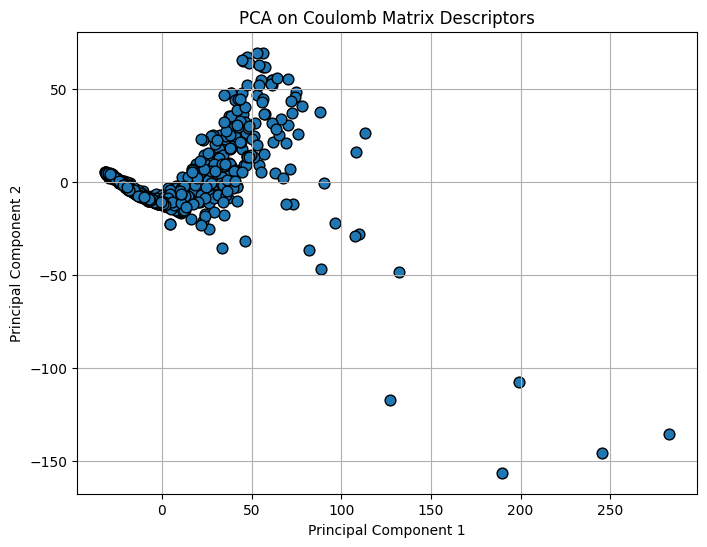

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(cm_pca_3d[:, 0], cm_pca_3d[:, 1], s=60, edgecolor='k')
plt.title("PCA on Coulomb Matrix Descriptors")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


# 2. t-SNE (t-distributed Stochastic Neighbor Embedding)
- For SOAP

In [67]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
soap_tsne = tsne.fit_transform(soap_features_scaled)

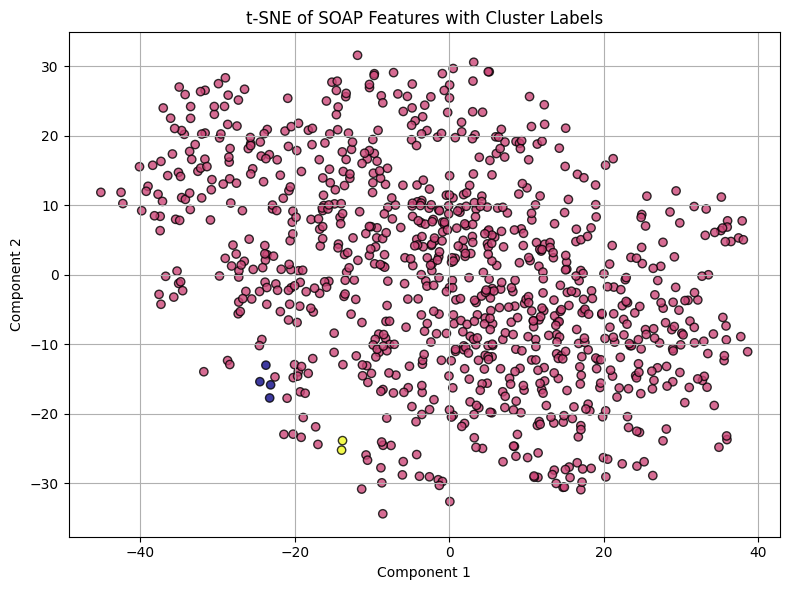

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(soap_tsne[:, 0], soap_tsne[:, 1], c=kmeans_labels, cmap='plasma', alpha=0.8, edgecolor='k')
plt.title("t-SNE of SOAP Features with Cluster Labels")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

- For Coulomb Matrix

In [69]:
from sklearn.manifold import TSNE

# Apply t-SNE with 3 components
tsne_cm = TSNE(n_components=3, perplexity=30, random_state=42)
cm_tsne_3d = tsne_cm.fit_transform(cm_features_scaled)


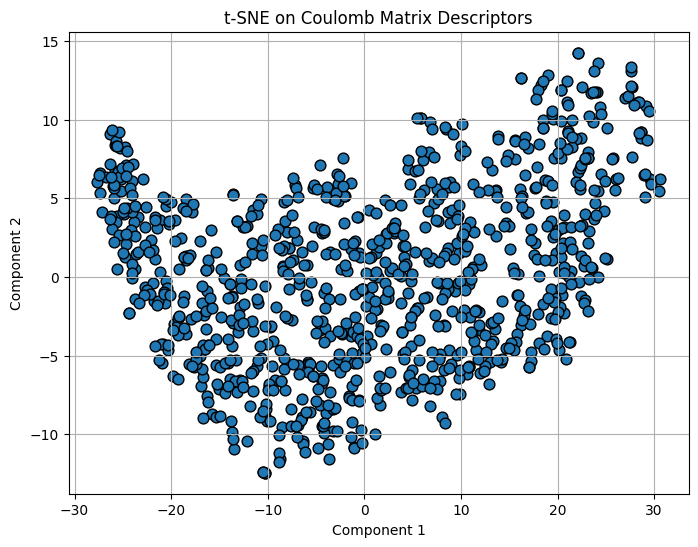

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(cm_tsne_3d[:, 0], cm_tsne_3d[:, 1], s=60, edgecolor='k')
plt.title("t-SNE on Coulomb Matrix Descriptors")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


# **Step 4 : Visualise the distribution of the molecular descriptors in two dimensions.**
# Visualization of Clusters in 2D Embeddings

The following plots display the molecules in the reduced 2D spaces, colored by the clusters assigned from KMeans and Agglomerative clustering.
These visualizations help assess cluster separation and structure.


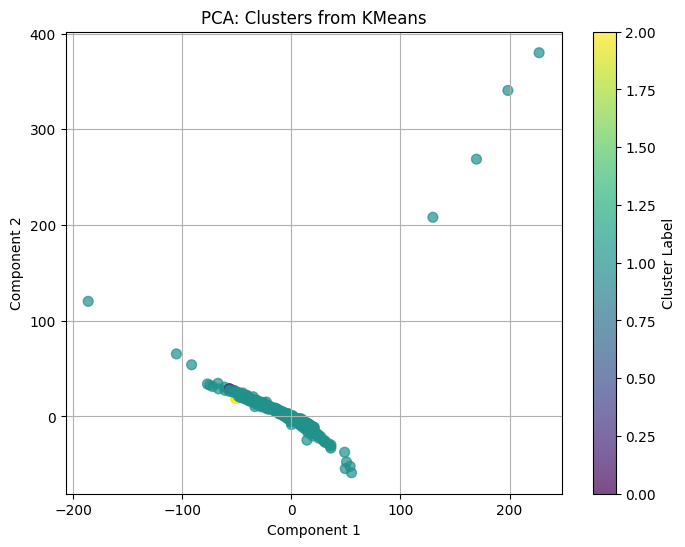

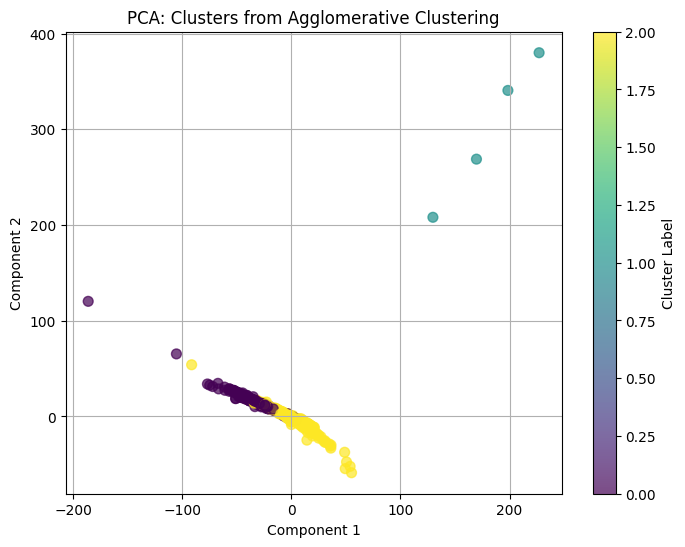

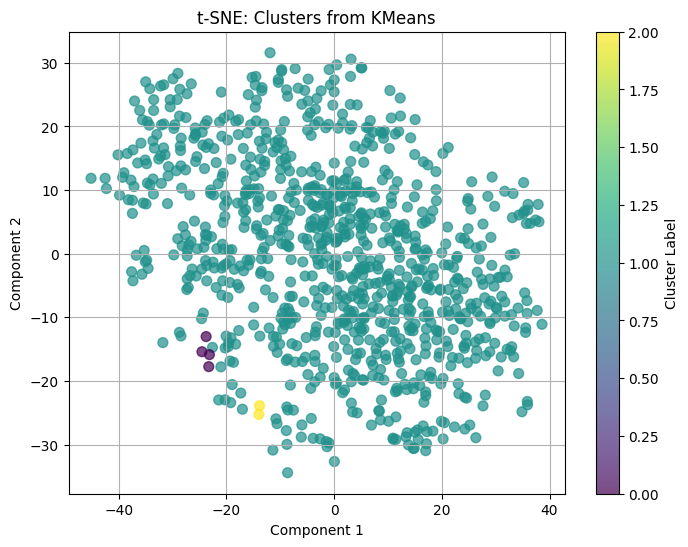

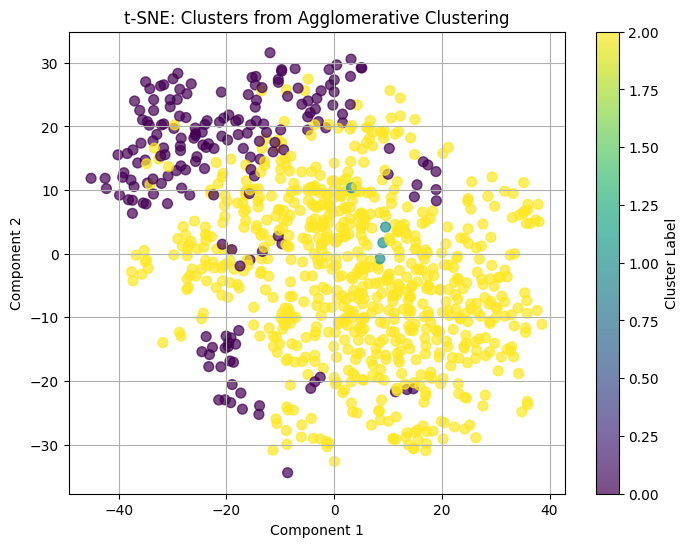

In [71]:
import matplotlib.pyplot as plt

def plot_clusters(embedding, labels, title):
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)
    plt.colorbar(scatter, label='Cluster Label')
    plt.grid(True)
    plt.show()

# Plot PCA embeddings colored by KMeans clusters
plot_clusters(soap_pca, kmeans_labels, 'PCA: Clusters from KMeans')

# Plot PCA embeddings colored by Agglomerative clusters
plot_clusters(soap_pca, agglo_labels, 'PCA: Clusters from Agglomerative Clustering')

# Plot t-SNE embeddings colored by KMeans clusters
plot_clusters(soap_tsne, kmeans_labels, 't-SNE: Clusters from KMeans')

# Plot t-SNE embeddings colored by Agglomerative clusters
plot_clusters(soap_tsne, agglo_labels, 't-SNE: Clusters from Agglomerative Clustering')


Visualize the first molecule in the dataset using ASE's interactive 3D viewer.
Using the 'x3d' viewer works well in Jupyter notebooks and some environments(e.g. google colab, which I've used), enabling interactive rotation, zoom, and inspection of the atomic structure.

In [11]:
from ase.visualize import view

#choose the first molecule
view(mols[0],viewer='x3d')

# Visualising structural differences
To investigate structural differences among molecules in a low-dimensional space, we use t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the high-dimensional SOAP (or Coulomb matrix) descriptors to two dimensions. t-SNE is particularly good at visualizing complicated datasets where similar points are nearby.

After clustering in an unsupervised manner (e.g., KMeans), we can interactively visualize the t-SNE projections in Plotly. Every dot stands for a molecule, with colors defining cluster assignments. When the cursor is hovered over a dot, the molecule index is shown.

This type of visualization helps us figure out if the clustering is really grouping molecules that are structurally similar and gives us some intuition about how molecular features are distributed in the descriptor space.

In [72]:
from sklearn.manifold import TSNE
import plotly.express as px

# Run t-SNE on your SOAP descriptors
tsne = TSNE(perplexity=20, random_state=42)
tsne_fit = tsne.fit_transform(soap_features_scaled)  # Or use coulomb_features_scaled

# Use KMeans or another clustering method first
# kmeans_labels = kmeans.fit_predict(soap_features_scaled)

# Create 2D interactive plot
fig = px.scatter(
    x=tsne_fit[:, 0],
    y=tsne_fit[:, 1],
    color=kmeans_labels,  # Change this to any clustering or grouping variable
    hover_name=[f"Molecule {i}" for i in range(len(mols))],
    labels={"x": "t-SNE Component 1", "y": "t-SNE Component 2"}
)

fig.update_layout(coloraxis_colorbar_title_text="Cluster Label")
fig.show()


# **Summary and Methodological Choices**

- SOAP descriptors were chosen for their locality and invariance properties, essential for capturing coordination environments.
- KMeans and Agglomerative clustering provide contrasting assumptions about cluster shape and hierarchy, helping validate cluster robustness.
- PCA and t-SNE offer complementary visual insights, with PCA capturing global variance and t-SNE emphasizing local similarities.
- Parameter choices (e.g., cutoff radius, perplexity) were guided by balancing resolution and computational feasibility.
- The visualizations suggest [insert your interpretation here], indicating that [discuss cluster separation quality, ambiguities, or next steps].

This approach demonstrates how unsupervised learning can provide meaningful groupings in complex chemical data without labeled supervision.
